# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Gankin, Dennis*
* *Zhang, Yuan*
* *Ji, Yipeng*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---
### Importing the networks

In [1]:
import networkx as nx
G_absorbing=nx.read_adjlist("data/absorbing.graph")
G_components=nx.read_adjlist("data/components.graph")
import matplotlib as plt

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [84]:
from random import randint,choice

def random_surfer(G,iterations):
    amount_nodes=len(G.nodes())
    ranks= {int(key): 0 for key in G.nodes()}
    edges=list(G.edges())
    
    current_node=randint(0,amount_nodes-1)
    
    for i in range(iterations):
        ranks[current_node]+=1
        #pick netx node randomly from neighbors
        current_node=int(choice(list(G[str(current_node)])))
        
    #nromalize ranks
    if iter!=0:
        for i in range(len(ranks)):
            ranks[i]=ranks[i]/iterations
            
    return ranks


#### Random surfer on absorbing Graph

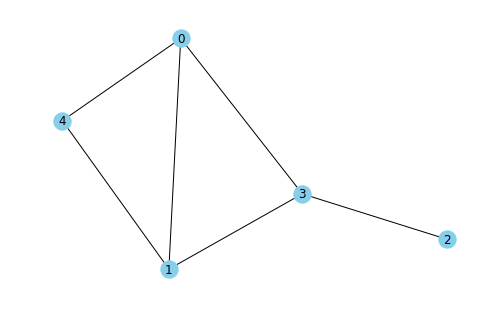

In [72]:
nx.draw(G_absorbing,with_labels=True,node_color="skyblue")

In [85]:
for i in range(10):
    print (random_surfer(G_absorbing,5000))

{0: 0.2398, 1: 0.2484, 4: 0.1608, 2: 0.0932, 3: 0.2578}
{0: 0.2482, 1: 0.2574, 4: 0.1618, 2: 0.0838, 3: 0.2488}
{0: 0.259, 1: 0.2532, 4: 0.1688, 2: 0.0764, 3: 0.2426}
{0: 0.2452, 1: 0.2414, 4: 0.1644, 2: 0.0892, 3: 0.2598}
{0: 0.2522, 1: 0.2454, 4: 0.163, 2: 0.0832, 3: 0.2562}
{0: 0.2416, 1: 0.2496, 4: 0.1652, 2: 0.0862, 3: 0.2574}
{0: 0.2502, 1: 0.248, 4: 0.1622, 2: 0.089, 3: 0.2506}
{0: 0.2452, 1: 0.2472, 4: 0.1588, 2: 0.0902, 3: 0.2586}
{0: 0.2464, 1: 0.2482, 4: 0.1668, 2: 0.089, 3: 0.2496}
{0: 0.2568, 1: 0.2414, 4: 0.1672, 2: 0.0834, 3: 0.2512}


#### Random surfer on components graph

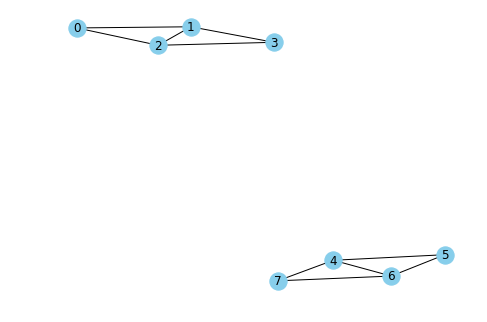

In [78]:
nx.draw(G_components,with_labels=True,node_color="skyblue")

In [86]:
for i in range(10):
    print(random_surfer(G_components,5000))
print ("-----------------")
for i in range(10):
    print(random_surfer(G_components,5000))

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2968, 5: 0.2014, 6: 0.3038, 7: 0.198}
{0: 0.1932, 1: 0.2944, 2: 0.3026, 3: 0.2098, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.302, 5: 0.1994, 6: 0.3006, 7: 0.198}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2972, 5: 0.1996, 6: 0.3024, 7: 0.2008}
{0: 0.198, 1: 0.301, 2: 0.2964, 3: 0.2046, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.1902, 1: 0.2944, 2: 0.304, 3: 0.2114, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2022, 1: 0.3068, 2: 0.2968, 3: 0.1942, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.1984, 1: 0.3016, 2: 0.2984, 3: 0.2016, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.301, 5: 0.2034, 6: 0.299, 7: 0.1966}
{0: 0.2046, 1: 0.2956, 2: 0.3086, 3: 0.1912, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
-----------------
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2952, 5: 0.19, 6: 0.3026, 7: 0.2122}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2988, 5: 0.2062, 6: 0.2978, 7: 0.1972}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2996, 5: 0.193, 6: 0.297, 7: 0

---

As we can see when running the random surfer model a few times both graphs do not seem to converge completely. The absorbing graph has similar rankings with some variance. Here the dangling node (node 2) does not allow the algorithm to get an exact result. It has no outgoing edge which leads to more visits on node 3 as it is the only way back. That makes its importance higher than it should be.

Random surfer on the components graph returns very different results because either one component is surfed or the other which causes the nodes of the not surfed component to have rank 0.


#### Exercise 2.13

In [82]:
from random import random

def random_surfer_better(G,iterations,damping_factor=0.15):
    amount_nodes=len(G.nodes())
    #create dictionary for ranks
    ranks= {int(key): 0 for key in G.nodes()}
    edges=list(G.edges())
    
    #first node randomly
    current_node=randint(0,amount_nodes-1)
    
    for i in range(iterations):
        ranks[current_node]+=1
        #get neighbors
        neighbors=list(G[str(current_node)])        
        
        #random restart if dangling edge or randomly (damping factor)
        if (random()>damping_factor) and (len(neighbors)>1):
                       current_node=int(choice(list(neighbors)))
        else:
                       current_node=randint(0,amount_nodes-1)
        
    #normalizing
    if iter!=0:
        for i in range(len(ranks)):
            ranks[i]=ranks[i]/iterations
            
    return ranks


In [83]:
for i in range(10):
    print (random_surfer_better(G_absorbing,5000))

{0: 0.2592, 1: 0.2576, 4: 0.2056, 2: 0.0946, 3: 0.183}
{0: 0.2604, 1: 0.2626, 4: 0.1928, 2: 0.0932, 3: 0.191}
{0: 0.2546, 1: 0.2616, 4: 0.1924, 2: 0.1072, 3: 0.1842}
{0: 0.2544, 1: 0.2678, 4: 0.1896, 2: 0.0984, 3: 0.1898}
{0: 0.2552, 1: 0.2594, 4: 0.192, 2: 0.1052, 3: 0.1882}
{0: 0.2422, 1: 0.2598, 4: 0.1966, 2: 0.1122, 3: 0.1892}
{0: 0.2558, 1: 0.2502, 4: 0.2006, 2: 0.1026, 3: 0.1908}
{0: 0.256, 1: 0.2526, 4: 0.1906, 2: 0.1042, 3: 0.1966}
{0: 0.2598, 1: 0.2582, 4: 0.1874, 2: 0.1032, 3: 0.1914}
{0: 0.259, 1: 0.2556, 4: 0.1882, 2: 0.1018, 3: 0.1954}


In [87]:
for i in range(10):
    print (random_surfer_better(G_components,5000))

{0: 0.0986, 1: 0.145, 2: 0.1442, 3: 0.1014, 4: 0.1468, 5: 0.106, 6: 0.153, 7: 0.105}
{0: 0.11, 1: 0.1522, 2: 0.1478, 3: 0.1004, 4: 0.1376, 5: 0.1092, 6: 0.1496, 7: 0.0932}
{0: 0.116, 1: 0.1552, 2: 0.1632, 3: 0.1046, 4: 0.1386, 5: 0.0948, 6: 0.1306, 7: 0.097}
{0: 0.1106, 1: 0.1546, 2: 0.1504, 3: 0.1068, 4: 0.1416, 5: 0.0924, 6: 0.1402, 7: 0.1034}
{0: 0.0988, 1: 0.1426, 2: 0.1506, 3: 0.1024, 4: 0.1538, 5: 0.0988, 6: 0.1492, 7: 0.1038}
{0: 0.1052, 1: 0.165, 2: 0.156, 3: 0.111, 4: 0.1372, 5: 0.0974, 6: 0.138, 7: 0.0902}
{0: 0.097, 1: 0.1514, 2: 0.1496, 3: 0.108, 4: 0.1514, 5: 0.0976, 6: 0.1416, 7: 0.1034}
{0: 0.0984, 1: 0.1532, 2: 0.1534, 3: 0.1112, 4: 0.1378, 5: 0.0986, 6: 0.1508, 7: 0.0966}
{0: 0.1132, 1: 0.157, 2: 0.1546, 3: 0.1108, 4: 0.1342, 5: 0.0952, 6: 0.1388, 7: 0.0962}
{0: 0.1054, 1: 0.1516, 2: 0.1442, 3: 0.098, 4: 0.1458, 5: 0.1022, 6: 0.151, 7: 0.1018}


---

We can see better results and convergence with the second implementation. We think the page rank makes intuitive sense. For the component graph we can see that nodes in both components have similar ranks. The nodes with degree three have a higher score than the nodes with degree two which makes sense because they are more central. In the absorbing graph the dangling graph has a lower score that the other nodes which also makes sense. All in all page rank seems quite intuitive 

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [64]:
def power_iter(G,max_iter,damping_factor=0.85):
    #networkx pagerank does power iteration
    return nx.pagerank(G, alpha=damping_factor, max_iter=max_iter)

In [151]:
def power_iteration(G,max_iter,alpha=0.85):
    #tolerance or checking convergence
    tolerance=1.0e-6
    
    #make directed graph for easier math later
    D = G.to_directed()

    # Put graph in stochastic form for the math part
    W = nx.stochastic_graph(D)
    N = W.number_of_nodes()

    # fixed starting vector
    x = {key:1.0 / N for key in W.nodes()}

    # create dictionary for dangling nodes and indicator vector of dangling nodes (dangling_w)
    dangling_w = {key:1.0 / N for key in W.nodes()}
    dangling_nodes = [n for n in W if W.out_degree(n) == 0.0]
    

    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        #x_before is x_(k-1)
        #x is x_k
        x_before = x
        x = {key:0 / N for key in x_before.keys()}

        #part of the transition matrix H for later
        dangling_sum =  sum(x_before[n] for n in dangling_nodes) 
        
        for n in x:
            # do left multiply x^G=x_before^G*H
            for i in W[n]:
                x[i] += alpha * x_before[n] * W[n][i]['weight']
                
            x[n] += alpha * dangling_sum * dangling_w.get(n, 0) + (1.0 - alpha) * 1/N
            
        # check for convergence with L1 norm
        err = sum([abs(x[n] - x_before[n]) for n in x])
        if err < N * tolerance:
            return x
    print ("not converged")
    return x

In [133]:
power_iter(G_absorbing,1000)

{'0': 0.24007885750131536,
 '1': 0.24007885750131536,
 '2': 0.10148742562440749,
 '3': 0.2523098174649017,
 '4': 0.16604504190805977}

In [152]:
power_iteration(G_components,1000)

{'0': 0.10239388052357877,
 '1': 0.1476061194764212,
 '2': 0.14760611947642116,
 '3': 0.10239388052357877,
 '4': 0.1476061194764212,
 '5': 0.10239388052357877,
 '6': 0.14760611947642116,
 '7': 0.10239388052357877}

In [63]:
G_wiki=nx.read_adjlist("data/wikipedia.graph")

In [67]:
power_iter(G_wiki,500)

{'0': 0.0002811365709548546,
 '4': 0.00017081706107945573,
 '307': 0.00016603984535536913,
 '312': 0.0002160028721179879,
 '316': 0.00013264977818620656,
 '367': 0.00027925655990128194,
 '438': 0.0002832552693504173,
 '444': 0.00026458531119823826,
 '508': 0.0006247566806847347,
 '593': 0.0006120493015724249,
 '594': 0.0001258567424228207,
 '653': 0.0005494944951862918,
 '671': 0.00046648737752147596,
 '672': 0.00019454559021017605,
 '700': 0.00035606536641365216,
 '819': 0.00017073490192187255,
 '839': 0.0001719133327735988,
 '878': 0.00014452740301565433,
 '1047': 0.0004809925663587129,
 '1125': 9.741879385855697e-05,
 '1208': 0.0005142800207068211,
 '1235': 0.001925002209972531,
 '1237': 0.00042401099816686557,
 '1363': 0.00040295930245424274,
 '1369': 0.0002784425673209868,
 '1671': 0.0002054301563828303,
 '1575': 0.00018709822671444828,
 '1609': 0.00010301032076493709,
 '1687': 0.00025796615782894126,
 '1818': 0.0018412257123001862,
 '1923': 9.875527413810469e-05,
 '2061': 0.00100

In [167]:
wiki_ranks=power_iteration(G_wiki,500)
wiki_top=sorted(wiki_ranks,key=wiki_ranks.get,reverse=True)[0:10]
from pandas import read_csv
titles = read_csv("data/wikipedia_titles.tsv", sep="\t")

In [204]:
top_articles=[]
for elem in wiki_top:
    top_articles.append(titles.get_values()[int(elem)])

print ("Top ten wiki pages:")
for i in top_articles:
    print (i)

Top ten wiki pages:
[5210 'United States']
[5201 'United Kingdom']
[2034 'France']
[1811 'England']
[1890 'Europe']
[2168 'Germany']
[3141 'London']
[2619 'India']
[5477 'World War II']
[687 'Australia']


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*